# Explore here

In [1]:
# Your code here

import pandas as pd 

df = pd.read_csv('../data/raw/River_Arno.csv')

df

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,26/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
8213,27/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
8214,28/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
8215,29/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [4]:
ts = pd.DataFrame()
ts['Date'] = pd.to_datetime(df['Date'], format = "%d/%m/%Y")
ts['Hyd'] = df['Hydrometry_Nave_di_Rosano']
ts.index = ts['Date']
ts.drop(columns = 'Date', axis = 1, inplace = True)

ts

,Hyd
Date,
1998-01-01,1.82
1998-01-02,1.94
1998-01-03,2.11
1998-01-04,1.84
1998-01-05,1.88
...,...
2020-06-26,1.34
2020-06-27,1.21
2020-06-28,1.30


In [5]:
!pip install stattools

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 5.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [6]:
ts.isnull().sum()

Hyd    48
dtype: int64

In [9]:
ts = ts.interpolate(method = 'linear')
ts.isnull().sum()

Hyd    0
dtype: int64

In [10]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 41.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 30.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


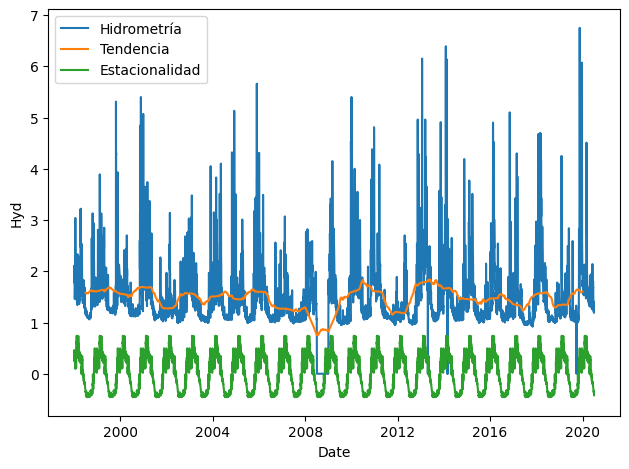

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ts, period = 365)

trend = decomp.trend
seasonal = decomp.seasonal

import matplotlib.pyplot as plt
import seaborn as sns 

sns.lineplot(data = ts, x = ts.index, y = ts.Hyd, label = "Hidrometría")
sns.lineplot(data = trend, label = "Tendencia")
sns.lineplot(data = seasonal, label = "Estacionalidad")

plt.tight_layout()
plt.show()



In [12]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller")
    dftest =  adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = {"Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"})
    for key, value in dftest[4].items():
        dfoutput["Critical value (%s)"%key] = value
    return dfoutput

test_stationarity(ts) 


Resultados de la prueba de Dickey-Fuller


#Lags Used                    -7.825536e+00
Test Statistic                 6.496928e-12
Number of Observations Used    3.700000e+01
p-value                        8.179000e+03
Critical value (1%)           -3.431150e+00
Critical value (5%)           -2.861893e+00
Critical value (10%)          -2.566958e+00
dtype: float64